In [4]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

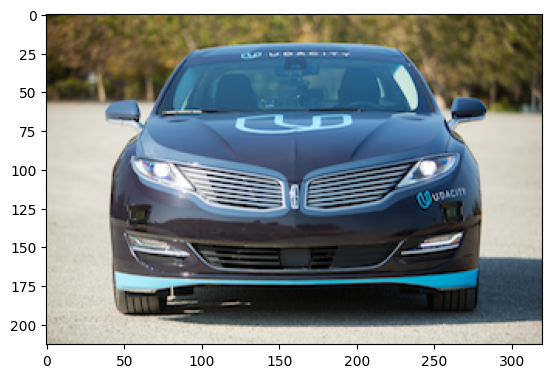

In [58]:
image = mpimg.imread(r"C:\Users\abhis\Mine\CV_parle\images\udacity_sdc.png")
plt.imshow(image)

In [59]:
import cv2

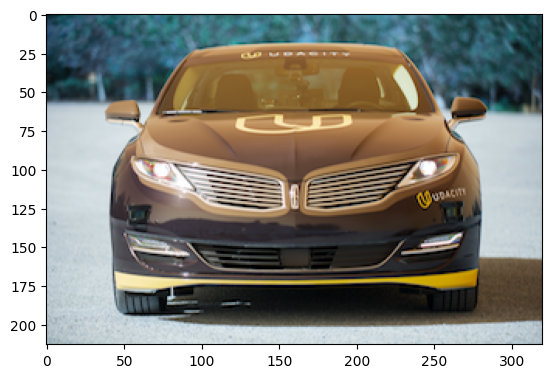

In [60]:
image_copy = cv2.imread(r"C:\Users\abhis\Mine\CV_parle\images\udacity_sdc.png")
plt.imshow(image_copy)

In [61]:
image_copy.shape

(213, 320, 3)

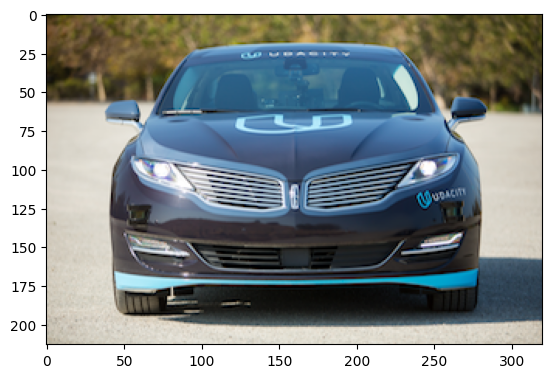

In [62]:
rgb_image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

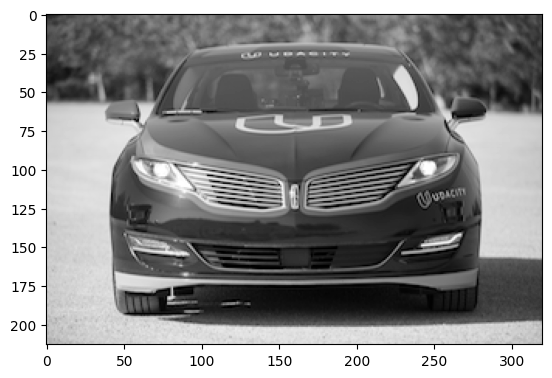

In [63]:
gray = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

In [64]:
gray.shape

(213, 320)

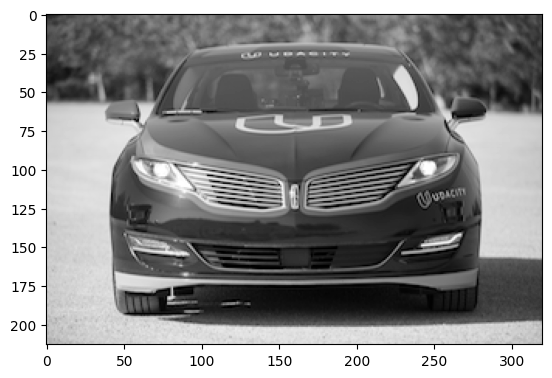

In [65]:
gray = gray.astype("float32")/255
plt.imshow(gray, cmap="gray")

In [81]:
filter_vals = np.array([[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1],[-1,-1,1,1]])
filter_vals.shape

(4, 4)

In [82]:
filter_1 = filter_vals
filter_2 = -filter_1
filter_3 = filter_vals.T
filter_4 = -filter_3

filters = np.array([filter_1,filter_2,filter_3,filter_4])
print(filters)

[[[-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]
  [-1 -1  1  1]]

 [[ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]
  [ 1  1 -1 -1]]

 [[-1 -1 -1 -1]
  [-1 -1 -1 -1]
  [ 1  1  1  1]
  [ 1  1  1  1]]

 [[ 1  1  1  1]
  [ 1  1  1  1]
  [-1 -1 -1 -1]
  [-1 -1 -1 -1]]]


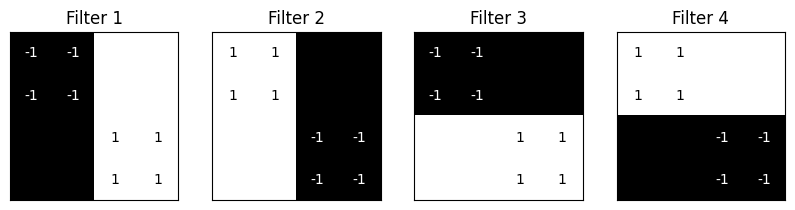

In [83]:
fig = plt.figure(figsize=(10,5))

for i in range(4):
    ax = fig.add_subplot(1,4, i+1,xticks = [], yticks = [])
    ax.imshow(filters[i],cmap = "gray")
    ax.set_title("Filter %s" % str(i+1))
    width,height = filters[i].shape
    for j in range(width):
        for k in range(height):
            ax.annotate(str(filters[i][j][k]), xy = (j,k),
                       horizontalalignment = "center",
                       verticalalignment = "center",
                       color = "white" if filters[i][j][k] < 0 else "black")

In [84]:
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # returns both layers
        return conv_x, activated_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
)


In [85]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

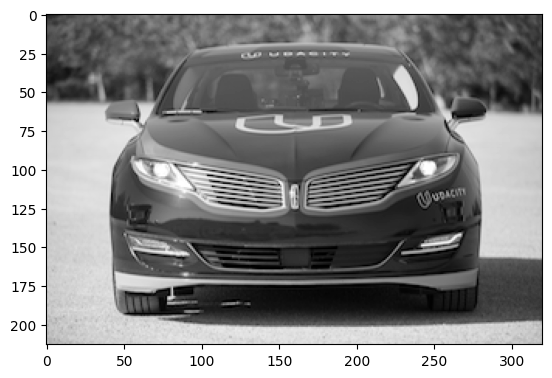

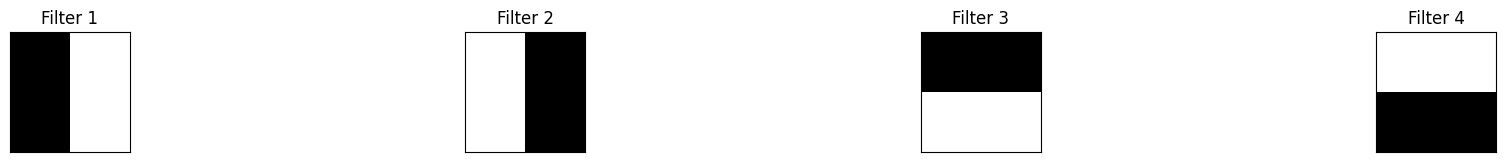

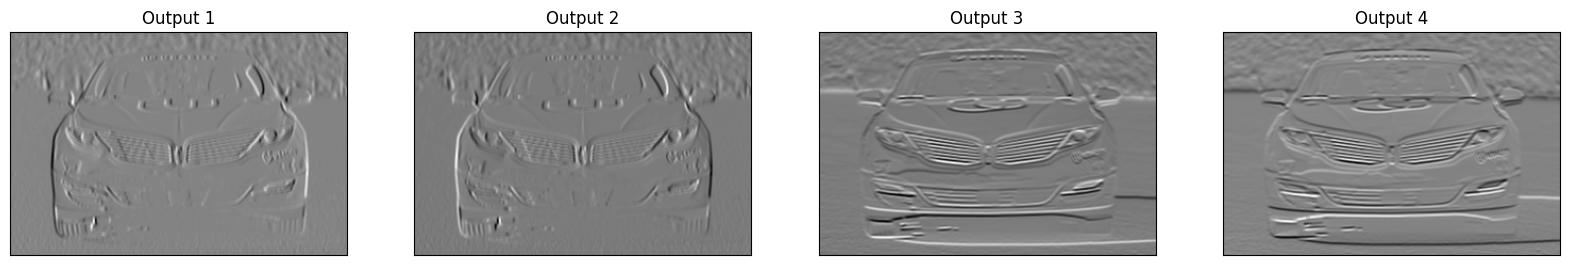

In [86]:
# plot original image
plt.imshow(gray, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

# get the convolutional layer (pre and post activation)
conv_layer, activated_layer = model(gray_img_tensor)

# visualize the output of a conv layer
viz_layer(conv_layer)

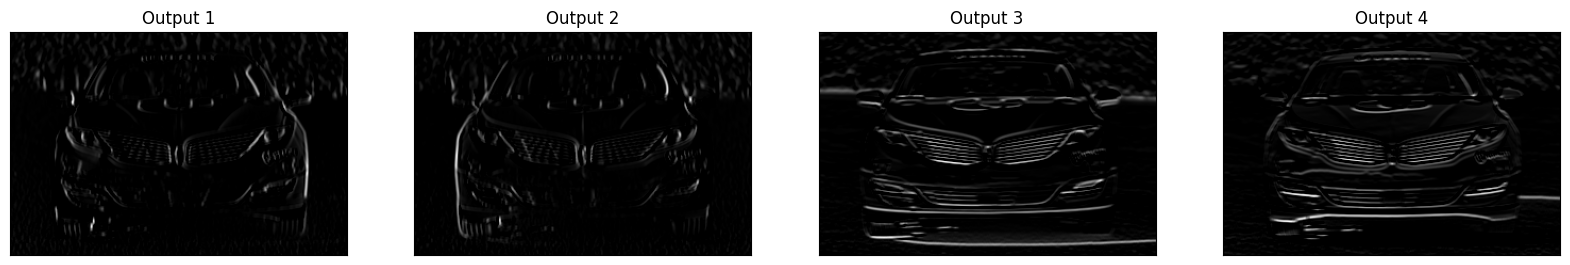

In [87]:
# after a ReLu is applied
# visualize the output of an activated conv layer
viz_layer(activated_layer)

# Pooling

In [88]:
# define a neural network with a convolutional layer with four filters
# AND a pooling layer of size (4, 4)
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # assumes there are 4 grayscale filters
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(4, 4)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        
        # applies pooling layer
        pooled_x = self.pool(activated_x)
        
        # returns all layers
        return conv_x, activated_x, pooled_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)

# print out the layer in the network
print(model)

Net(
  (conv): Conv2d(1, 4, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (pool): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
)


In [89]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

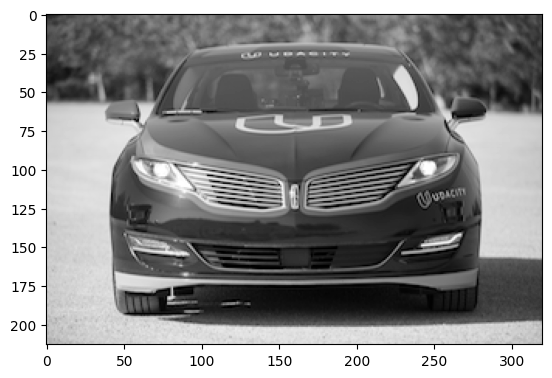

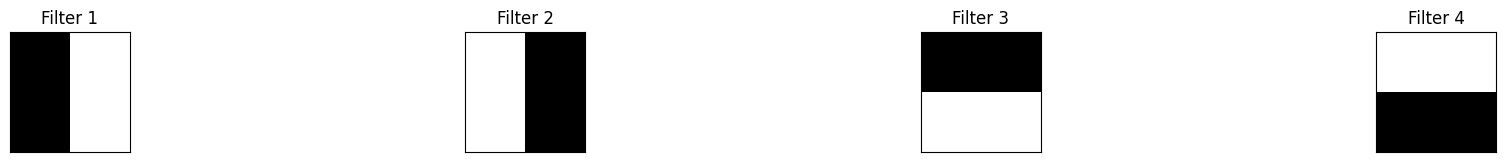

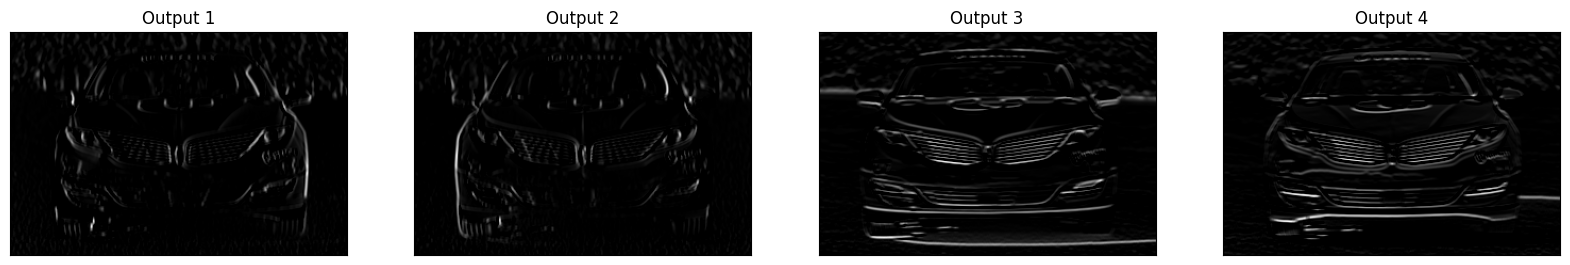

In [90]:
# plot original image
plt.imshow(gray, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor)

# visualize the output of the activated conv layer
viz_layer(activated_layer)

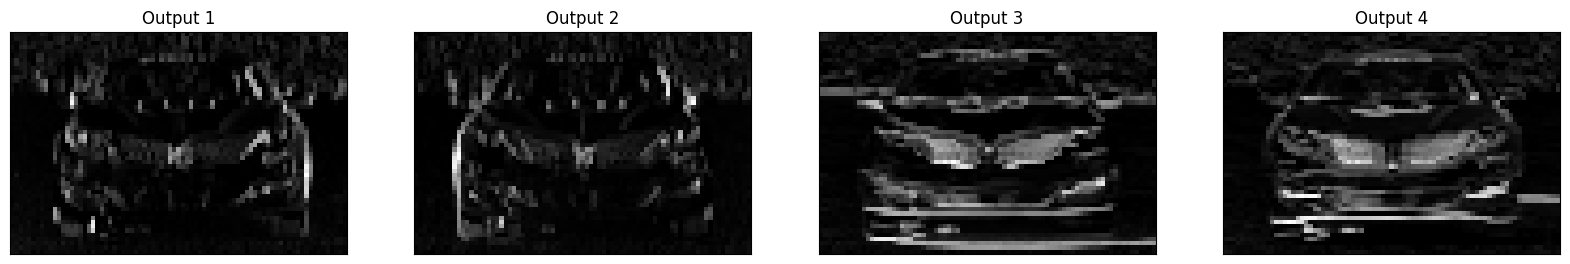

In [91]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)